In [31]:
import amrlib

In [32]:
stog = amrlib.load_stog_model()
graphs = stog.parse_sents(['This is a test of the system.', 'This is a second sentence.'])
for graph in graphs:
    print(graph)

# ::snt This is a test of the system.
(t / test-01
      :ARG1 (s / system)
      :domain (t2 / this))
# ::snt This is a second sentence.
(s / sentence
      :ord (o / ordinal-entity
            :value 2)
      :domain (t / this))


In [33]:
gtos = amrlib.load_gtos_model()
sents, _ = gtos.generate(graphs)
for sent in sents:
    print(sent)

KeyboardInterrupt: 

In [4]:
import spacy
amrlib.setup_spacy_extension()
nlp = spacy.load('en_core_web_sm')
doc = nlp('This is a test of the SpaCy extension. The test has multiple sentences.')
graphs = doc._.to_amr()
for graph in graphs:
    print(graph)

# ::snt This is a test of the SpaCy extension.
(t / test-01
      :ARG1 (e / extend-01
            :ARG1 (p / product
                  :name (n / name
                        :op1 "SpaCy")))
      :domain (t2 / this))
# ::snt The test has multiple sentences.
(h / have-03
      :ARG0 (t / test)
      :ARG1 (s / sentence
            :quant (m / multiple)))


In [5]:
import json
import amrlib
import spacy

In [6]:
amrlib.setup_spacy_extension()
nlp = spacy.load('en_core_web_sm')

In [7]:
# Path to your JSONL file
file_path = "data/massive_amr.jsonl"

In [8]:
# Read the JSONL file
with open(file_path, "r", encoding="utf-8") as file:
    data = [json.loads(line) for line in file]

In [9]:
# Extract sentences and AMR graphs
sentences = [entry["utt"] for entry in data]
amr_graphs = [entry["raw_amr"] for entry in data]

In [10]:
# --- Test STOG: Convert Sentences to AMR ---
print("\n### STOG: Sentences to AMR ###")
parsed_graphs = stog.parse_sents(sentences[:5])  # Test on first 5 sentences
for sent, graph in zip(sentences[:5], parsed_graphs):
    print(f"\nSentence: {sent}\nAMR Graph:\n{graph}")


### STOG: Sentences to AMR ###

Sentence: what are some updates about the stock market
AMR Graph:
# ::snt what are some updates about the stock market
(u / update-02
      :ARG1 (m / market
            :mod (s / stock))
      :ARG2 (a / amr-unknown)
      :quant (s2 / some))

Sentence: definition of velocity
AMR Graph:
# ::snt definition of velocity
(d / define-01
      :ARG1 (v / velocity))

Sentence: please look up exchange between us and mexico
AMR Graph:
# ::snt please look up exchange between us and mexico
(l / look-up-05
      :polite +
      :mode imperative
      :ARG0 (y / you)
      :ARG1 (e / exchange-01
            :ARG0 (w / we)
            :ARG2 (c / country
                  :name (n / name
                        :op1 "Mexico"))))

Sentence: can you describe to me what a pineapple looks like
AMR Graph:
# ::snt can you describe to me what a pineapple looks like
(p / possible-01
      :polarity (a / amr-unknown)
      :ARG1 (d / describe-01
            :ARG0 (y / you)
  

In [11]:
# --- Test GTOS: Convert AMR to Sentences ---
print("\n### GTOS: AMR to Sentences ###")
reconstructed_sentences, _ = gtos.generate(amr_graphs[:5])  # Test on first 5 AMRs
for amr, recon_sent in zip(amr_graphs[:5], reconstructed_sentences):
    print(f"\nAMR:\n{amr}\nReconstructed Sentence: {recon_sent}")


### GTOS: AMR to Sentences ###

AMR:
(u / update-02
      :ARG2 (a / amr-unknown)
      :topic (m / market-01
            :ARG1 (s / stock))
      :mod (s2 / some))
Reconstructed Sentence: What are some stock market updates?

AMR:
(d / define-01
      :ARG1 (v / velocity)
      :ARG2 (a / amr-unknown))
Reconstructed Sentence: What is the definition of velocity?

AMR:
(l / look-up-05 :mode imperative :polite +
      :ARG0 (y / you)
      :ARG1 (e / exchange-01
            :ARG1 (c / currency
                  :mod (c3 / country :name (n / name :op1 "us")))
            :ARG3 (c2 / currency
                  :mod (c4 / country :name (n2 / name :op1 "mexico")))))
Reconstructed Sentence: Please look up exchange rates between US and Mexican currency.

AMR:
(d / describe-01 :mode imperative :polite +
      :ARG0 (y / you)
      :ARG1 (t / thing
            :ARG1-of (l / look-02
                  :ARG0 (f / food-dish :name (n / name :op1 "pineapple")))))
Reconstructed Sentence: Please describ

In [12]:
# --- Test SpaCy + AMR ---
print("\n### SpaCy AMR Extension ###")
for sent in sentences[:3]:  # Test on first 3 sentences
    doc = nlp(sent)
    doc_graphs = doc._.to_amr()
    for graph in doc_graphs:
        print(f"\nSentence: {sent}\nSpaCy AMR Graph:\n{graph}")


### SpaCy AMR Extension ###

Sentence: what are some updates about the stock market
SpaCy AMR Graph:
# ::snt what are some updates about the stock market
(u / update-02
      :ARG1 (m / market
            :mod (s / stock))
      :ARG2 (a / amr-unknown)
      :quant (s2 / some))

Sentence: definition of velocity
SpaCy AMR Graph:
# ::snt definition of velocity
(d / define-01
      :ARG1 (v / velocity))

Sentence: please look up exchange between us and mexico
SpaCy AMR Graph:
# ::snt please look up exchange between us and mexico
(l / look-up-05
      :polite +
      :mode imperative
      :ARG0 (y / you)
      :ARG1 (e / exchange-01
            :ARG0 (w / we)
            :ARG2 (c / country
                  :name (n / name
                        :op1 "Mexico"))))


# Let's try to translate the dataset to Irish

In [41]:
import json
from transformers import MarianMTModel, MarianTokenizer

In [42]:
# ----------------------------
# 1. Load Translation Model (English → Irish)
# ----------------------------

In [43]:
model_name = "Helsinki-NLP/opus-mt-en-ga"  # English to Irish
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

In [44]:
# ----------------------------
# 2. Load JSONL Data
# ----------------------------

In [45]:
input_file = "data/massive_amr.jsonl"
output_file = "data/massive_amr_irish.jsonl"

In [46]:
with open(input_file, "r", encoding="utf-8") as f:
    data = [json.loads(line) for line in f]

In [47]:
# ----------------------------
# 3. Translate Function
# ----------------------------

In [48]:
def translate_text(text, tokenizer, model):
    """Translates English text to Irish using MarianMT."""
    if not text.strip():
        return text  # Skip empty strings

    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)
    translated_tokens = model.generate(**inputs)
    translated_text = tokenizer.batch_decode(translated_tokens, skip_special_tokens=True)[0]

    return translated_text

In [49]:
# ----------------------------
# 4. Translate Sentences
# ----------------------------

In [50]:
for entry in data:
    entry["utt"] = translate_text(entry["utt"], tokenizer, model)
    entry["annot_utt"] = translate_text(entry["annot_utt"], tokenizer, model)

In [51]:
# ----------------------------
# 5. Save Translated Data
# ----------------------------

In [52]:
with open(output_file, "w", encoding="utf-8") as f:
    for entry in data:
        f.write(json.dumps(entry, ensure_ascii=False) + "\n")

In [53]:
print("✅ Translation complete! Saved as 'massive_amr_irish.jsonl'")

✅ Translation complete! Saved as 'massive_amr_irish.jsonl'


# Let's try to train the AMR Parser on Welsh

In [1]:
import amrlib
print(amrlib.__version__)  # Should print the version number
print(hasattr(amrlib, 'parse_string')) # Should print True

0.8.0
False


In [1]:
import amrlib
import json
import os
import random
import numpy as np
import torch
import matplotlib.pyplot as plt
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split
from transformers import (
    T5ForConditionalGeneration,
    T5Tokenizer,
    Trainer,
    TrainingArguments,
    DataCollatorForSeq2Seq,
    TrainerCallback
)

In [2]:
# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)
torch.cuda.empty_cache()

In [3]:
file_path = "data/massive_amr_welsh.jsonl"

In [4]:
def load_amr_data(file_path):
    """Loads a JSONL AMR dataset and removes entries with missing data."""
    with open(file_path, "r", encoding="utf-8") as file:
        data = [json.loads(line) for line in file]
    # Filter out entries missing either the sentence or AMR
    data = [entry for entry in data if entry.get("raw_amr") and entry.get("utt")]
    return data

In [5]:
data = load_amr_data(file_path)
random.shuffle(data)

In [6]:
# Extract sentences and AMR graphs
sentences = [entry["utt"] for entry in data]
amrs = [entry["raw_amr"] for entry in data]

In [7]:
# Split into train, validation, and test sets (90/10 then 10% of train for validation)
train_sents, test_sents, train_amrs, test_amrs = train_test_split(sentences, amrs, test_size=0.1, random_state=42)
train_sents, val_sents, train_amrs, val_amrs = train_test_split(train_sents, train_amrs, test_size=0.1, random_state=42)

In [8]:
# Convert to Hugging Face Dataset format
def create_dataset(sentences, amrs):
    return Dataset.from_dict({"sentence": sentences, "amr": amrs})

datasets = DatasetDict({
    "train": create_dataset(train_sents, train_amrs),
    "validation": create_dataset(val_sents, val_amrs),
    "test": create_dataset(test_sents, test_amrs),
})

In [9]:
# ==============================
# 3. Load Multilingual T5 Model (STOG & GTOS)
# ==============================
model_name = "t5-small"  # You can use a larger model if resources allow.
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [10]:
def preprocess_function(examples):
    # For T5 it's common to add a task prefix. Here we add "parse: " before the sentence.
    inputs = ["parse: " + ex for ex in examples["sentence"]]
    targets = examples["amr"]

    # Tokenize inputs (source) and targets
    model_inputs = tokenizer(inputs, max_length=256, truncation=True, padding="max_length")
    labels = tokenizer(targets, max_length=512, truncation=True, padding="max_length")

    # Replace padding token id's in labels with -100 so they are ignored by the loss function
    labels["input_ids"] = [
        [l if l != tokenizer.pad_token_id else -100 for l in label]
        for label in labels["input_ids"]
    ]
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [11]:
# Apply tokenization
tokenized_datasets = datasets.map(preprocess_function, batched=True, remove_columns=["sentence", "amr"])


Map:   0%|          | 0/1364 [00:00<?, ? examples/s]

Map:   0%|          | 0/152 [00:00<?, ? examples/s]

Map:   0%|          | 0/169 [00:00<?, ? examples/s]

In [12]:
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [13]:
# ==============================
# 6. Define Optimized Training Arguments
# ==============================
training_args = TrainingArguments(
    output_dir="./amr_t5_model",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=3e-4,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    weight_decay=0.01,
    save_total_limit=2,
    logging_steps=50,
    logging_dir="./logs",
    report_to="none",
)

c:\Users\stoic\miniconda3\envs\llms_env\lib\site-packages\transformers\training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [14]:
# ----------------------------
# 5. Custom Callback for Logging and Visualization
# ----------------------------
class LossCallback(TrainerCallback):
    def __init__(self):
        self.losses = []
        self.eval_losses = []

    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs:
            if "loss" in logs:
                self.losses.append((state.global_step, logs["loss"]))
            if "eval_loss" in logs:
                self.eval_losses.append((state.global_step, logs["eval_loss"]))

    def plot_loss(self):
        steps, losses = zip(*self.losses)
        eval_steps, eval_losses = zip(*self.eval_losses)

        plt.figure(figsize=(10, 5))
        plt.plot(steps, losses, label="Training Loss", marker="o")
        plt.plot(eval_steps, eval_losses, label="Validation Loss", marker="x")
        plt.xlabel("Training Steps")
        plt.ylabel("Loss")
        plt.title("Training & Validation Loss Curve")
        plt.legend()
        plt.show()

In [15]:
loss_callback = LossCallback()

In [16]:
# ----------------------------
# 6. Initialize Trainer and Train the Model
# ----------------------------
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    callbacks=[loss_callback],
)

C:\Users\stoic\AppData\Local\Temp\ipykernel_20072\1705589252.py:4: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [17]:
print("Starting T5 Training for AMR Parsing...")
trainer.train()

Starting T5 Training for AMR Parsing...


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch,Training Loss,Validation Loss
1,1.038800,0.803618
2,0.839300,0.687780
3,0.714700,0.623573
4,0.650600,0.588202
5,0.597100,0.569191
6,0.594500,0.556965
7,0.572400,0.546731
8,0.533300,0.540736
9,0.532300,0.534638
10,0.494900,0.533489


TrainOutput(global_step=1710, training_loss=0.7133498590592056, metrics={'train_runtime': 533.9115, 'train_samples_per_second': 25.547, 'train_steps_per_second': 3.203, 'total_flos': 923031086039040.0, 'train_loss': 0.7133498590592056, 'epoch': 10.0})

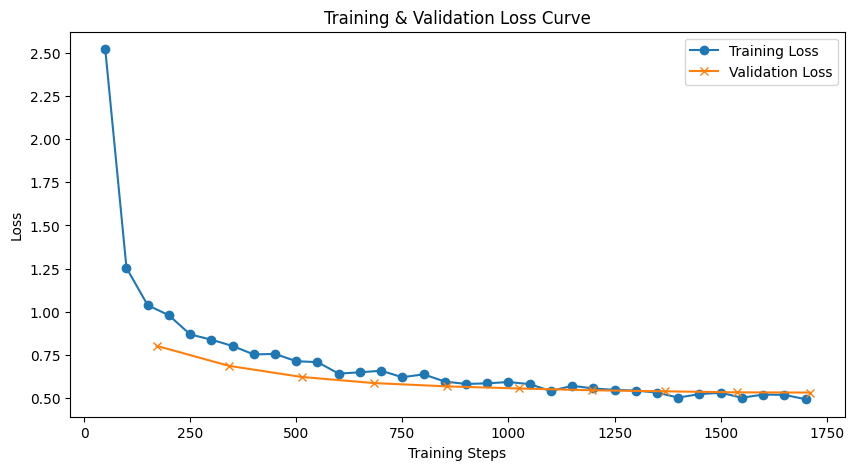

In [18]:
# ----------------------------
# 7. Plot Training Progress
# ----------------------------
loss_callback.plot_loss()

In [56]:
print("Dataset Columns:", datasets["test"].column_names)

Dataset Columns: ['sentence', 'amr']


In [54]:
print("Dataset Columns (after tokenization):", tokenized_datasets["test"].column_names)

Dataset Columns (after tokenization): ['input_ids', 'attention_mask', 'labels']


In [19]:
# ----------------------------
# 8. Save Fine-Tuned Model
# ----------------------------
model.save_pretrained("./fine_tuned_amr_t5")
tokenizer.save_pretrained("./fine_tuned_amr_t5")

('./fine_tuned_amr_t5\\tokenizer_config.json',
 './fine_tuned_amr_t5\\special_tokens_map.json',
 './fine_tuned_amr_t5\\spiece.model',
 './fine_tuned_amr_t5\\added_tokens.json')

# Calculate Smatch Score

In [30]:
import json
import torch
import smatch
import re
from collections import defaultdict
from transformers import T5ForConditionalGeneration, T5Tokenizer
from datasets import Dataset

In [31]:
# -----------------------------------
# ⿡ Load Fine-Tuned T5 Model & Tokenizer
# -----------------------------------
model_path = "./fine_tuned_amr_t5"
model = T5ForConditionalGeneration.from_pretrained(model_path)
tokenizer = T5Tokenizer.from_pretrained(model_path)

In [32]:
# Move model to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
model.eval()

T5ForConditionalGeneration(
  (shared): Embedding(32128, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=512, out_features=512, bias=False)
              (k): Linear(in_features=512, out_features=512, bias=False)
              (v): Linear(in_features=512, out_features=512, bias=False)
              (o): Linear(in_features=512, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 8)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=512, out_features=2048, bias=False)
              (wo): Linear(in_features=2048, out_features=512, bias=False)
              (dropout): Drop

In [33]:
# Load Test Data
file_path = "data/massive_amr_welsh.jsonl"

In [34]:
def load_amr_data(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        data = [json.loads(line) for line in file]
    return [entry for entry in data if entry.get("raw_amr") and entry.get("utt")]

In [35]:
data = load_amr_data(file_path)
sentences = [entry["utt"] for entry in data]
gold_amrs = [entry["raw_amr"] for entry in data]
test_dataset = Dataset.from_dict({"sentence": sentences, "amr": gold_amrs})

In [36]:
# AMR Cleaning Functions
def balance_parentheses(amr_text):
    """Ensure AMR has balanced parentheses."""
    stack = []
    for char in amr_text:
        if char == "(":
            stack.append("(")
        elif char == ")":
            if stack:
                stack.pop()
            else:
                return "INVALID_AMR"
    return amr_text if not stack else "INVALID_AMR"

In [37]:
def fix_duplicate_nodes(amr_text):
    if not amr_text.strip():
        return "INVALID_AMR"
    
    amr_text = balance_parentheses(amr_text)
    if amr_text == "INVALID_AMR":
        return "INVALID_AMR"
    
    used_vars = defaultdict(int)
    renamed_vars = {}

    def rename_variable(match):
        var_name = match.group(1)
        if var_name in used_vars:
            new_var_name = f"{var_name}_{used_vars[var_name]}"
            used_vars[var_name] += 1
            renamed_vars[var_name] = new_var_name
            return f"({new_var_name} /"
        else:
            used_vars[var_name] = 1
            return f"({var_name} /"
    
    amr_text = re.sub(r"\((\w+)\s+/", rename_variable, amr_text)
    for old_var, new_var in renamed_vars.items():
        amr_text = amr_text.replace(f" {old_var} ", f" {new_var} ")
    
    return amr_text

In [38]:
def generate_amr_predictions(model, tokenizer, test_dataset, max_samples=100):
    predictions = []
    for i, example in enumerate(test_dataset):
        if i >= max_samples:
            break
        
        input_text = "parse: " + example["sentence"]
        input_ids = tokenizer.encode(input_text, return_tensors="pt").to(device)

        with torch.no_grad():
            output_ids = model.generate(input_ids, max_length=512)
        
        predicted_amr = tokenizer.decode(output_ids[0], skip_special_tokens=True)
        predicted_amr = fix_duplicate_nodes(predicted_amr)
        gold_amr = fix_duplicate_nodes(example["amr"])
        predictions.append((gold_amr, predicted_amr))
    
    return predictions

In [39]:
def is_valid_amr(amr):
    return amr.count('/') > 0 and amr != "INVALID_AMR"

In [40]:
def compute_smatch(gold_amrs, predicted_amrs):
    total_precision, total_recall, total_f1 = 0, 0, 0
    valid_samples = 0

    for i, (gold, pred) in enumerate(zip(gold_amrs, predicted_amrs)):
        try:
            if not is_valid_amr(pred) or not is_valid_amr(gold):
                print(f"Skipping sample {i} due to invalid AMR")
                continue
            
            precision, recall, f_score = smatch.get_amr_match(str(gold), str(pred))
            total_precision += precision
            total_recall += recall
            total_f1 += f_score
            valid_samples += 1
        except Exception as e:
            print(f"Error in Smatch calculation for sample {i}: {e}")
            print(f"Gold AMR: {gold}")
            print(f"Predicted AMR: {pred}")
            print("-" * 50)
    
    if valid_samples == 0:
        return 0, 0, 0
    
    return total_precision / valid_samples, total_recall / valid_samples, total_f1 / valid_samples

In [41]:
# Generate and Evaluate AMRs
predictions = generate_amr_predictions(model, tokenizer, test_dataset)
gold_amrs = [gold for gold, _ in predictions if gold is not None]
predicted_amrs = [pred for _, pred in predictions if pred is not None]
precision, recall, f1 = compute_smatch(gold_amrs, predicted_amrs)


Skipping sample 3 due to invalid AMR
Skipping sample 7 due to invalid AMR
Skipping sample 12 due to invalid AMR
Skipping sample 14 due to invalid AMR
Skipping sample 28 due to invalid AMR
Skipping sample 50 due to invalid AMR
Skipping sample 55 due to invalid AMR
Skipping sample 64 due to invalid AMR
Skipping sample 68 due to invalid AMR
Skipping sample 85 due to invalid AMR
Skipping sample 91 due to invalid AMR
Skipping sample 92 due to invalid AMR
Skipping sample 95 due to invalid AMR


In [42]:
# Display Results
print(f"Smatch Score - Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

Smatch Score - Precision: 4.9540, Recall: 11.3103, F1: 13.1379


# Check Dataset for Corruption

In [90]:
import json

In [91]:
# Load dataset
file_path = "data/massive_amr_welsh.jsonl"
valid_entries = []

In [92]:
with open(file_path, "r", encoding="utf-8") as f:
    for line in f:
        try:
            entry = json.loads(line)
            if "utt" in entry and "raw_amr" in entry and isinstance(entry["utt"], str) and isinstance(entry["raw_amr"], str):
                valid_entries.append(entry)
            else:
                print(f"❌ Corrupt entry found and skipped: {entry}")
        except json.JSONDecodeError:
            print(f"❌ JSON Decode Error in line: {line}")

In [93]:
print(f"✅ Valid samples: {len(valid_entries)}")

✅ Valid samples: 1685


In [94]:
# Save cleaned dataset
with open("data/cleaned_amr_welsh.jsonl", "w", encoding="utf-8") as f:
    for entry in valid_entries:
        f.write(json.dumps(entry) + "\n")

print("✅ Cleaned dataset saved as 'data/cleaned_amr_welsh.jsonl'")


✅ Cleaned dataset saved as 'data/cleaned_amr_welsh.jsonl'
